In [282]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import numpy as np
from sklearn.decomposition import PCA
df=pd.read_csv('country_wise_latest.csv')
df=df[['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
df=df.set_index('Country/Region')
df


,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Afghanistan,36263,1269,25198,9796
Albania,4880,144,2745,1991
Algeria,27973,1163,18837,7973
Andorra,907,52,803,52
Angola,950,41,242,667
...,...,...,...,...
West Bank and Gaza,10621,78,3752,6791
Western Sahara,10,1,8,1
Yemen,1691,483,833,375


In [283]:
country_map = df.to_dict(orient='index')

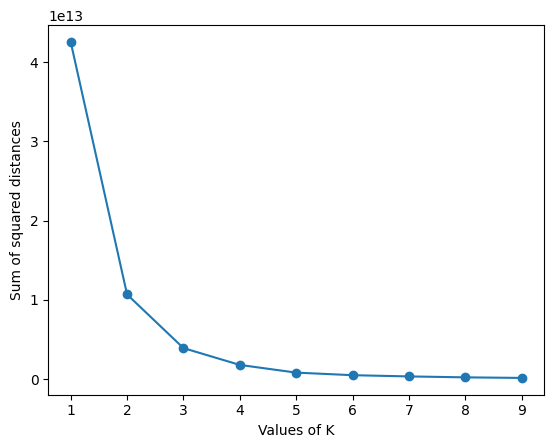

In [284]:
elbow_scores = dict()
range_of_k = range(1,10) 
for k in range_of_k :
 untrained_model = KMeans(n_clusters=k)
 trained_model=untrained_model.fit(df)
 elbow_scores[k]=trained_model.inertia_
 
plt.plot(elbow_scores.keys(),elbow_scores.values())
plt.scatter(elbow_scores.keys(),elbow_scores.values())
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances") 
plt.show()


In [285]:
country_map = df.to_dict(orient='index')

In [286]:
from sklearn.cluster import KMeans
k = 5
cluster_model = KMeans(n_clusters=k)
cluster_model.fit(df)
KMeans()
cluster_labels = cluster_model.predict(df)
country_cluster_df = pd.DataFrame(cluster_labels, index=df.index, columns=["cluster"])
country_cluster_df["cluster"].value_counts()
for cluster, country in country_cluster_df.groupby("cluster"):
    print("Cluster:", cluster, "Size:", songs.shape[0])
    
    num_samples = min(5, len(country))
    for a_id in country.sample(num_samples).index:
        print("\t", a_id)


Cluster: 0 Size: 167
	 United Kingdom
	 Iran
	 Mexico
	 Italy
	 Pakistan
Cluster: 1 Size: 167
	 US
Cluster: 2 Size: 167
	 Brazil
Cluster: 3 Size: 167
	 India
	 Russia
Cluster: 4 Size: 167
	 Western Sahara
	 Armenia
	 Vietnam
	 Moldova
	 South Sudan


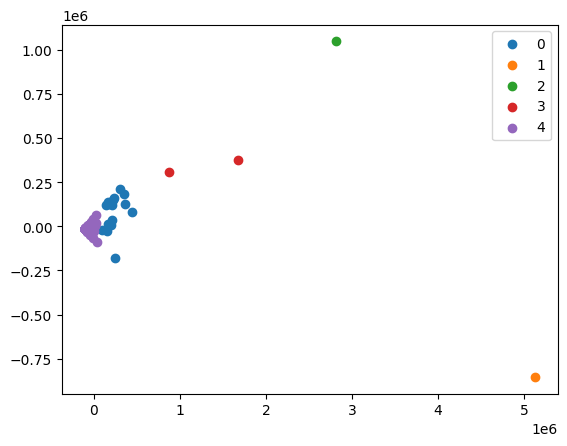

In [287]:
pca = PCA(2)
df = pca.fit_transform(df)
c_labels = np.unique(cluster_labels)
 
for i in c_labels:
    plt.scatter(df[cluster_labels == i , 0] , df[cluster_labels == i , 1] , label = i)
plt.legend()
plt.show()